In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [80]:
email = pd.read_csv('spam_ham_dataset.csv')
email

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [81]:
email = email.drop(['Unnamed: 0','label'],axis=1)
email

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [82]:
email.value_counts('label_num')

label_num
0    3672
1    1499
dtype: int64

This Implies that we have 3672 ham samples and 1499 spam samples


In [83]:
# checking to see if there's any null Values
email.isnull().sum()
# dropping the missing data if found any
email.dropna(inplace=True)

In [84]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [85]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import re
stop_words = set(stopwords.words('english'))
list1=[]

In [86]:
for i in range(0, len(email)):
    e_mail = re.sub('[^a-zA-Z]', ' ', email['text'][i])
    e_mail = e_mail.split()
    e_mail = [ps.stem(word) for word in e_mail if word.lower() not in stop_words]
    e_mail = " ".join(e_mail)
    list1.append(e_mail)

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
cv =CountVectorizer()

x = cv.fit_transform(list1).toarray()

In [88]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [89]:
y = email['label_num']

In [110]:
# Now we will divide data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [111]:
# Now using KNN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)

model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [112]:
# Now making predictions
y_pred = model.predict(x_test)

In [113]:
from sklearn.metrics import confusion_matrix , precision_score , recall_score , f1_score , accuracy_score

confusion_mat=confusion_matrix(y_test,y_pred,labels=None)
print("confusion_mat = ",confusion_mat)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("precision score = ",precision_score(y_test, y_pred))
print("recall score = ",recall_score(y_test, y_pred))
print("F1 score = ",f1_score(y_test, y_pred))

confusion_mat =  [[655  87]
 [ 21 272]]
Accuracy Score: 0.8956521739130435
precision score =  0.7576601671309192
recall score =  0.9283276450511946
F1 score =  0.8343558282208587


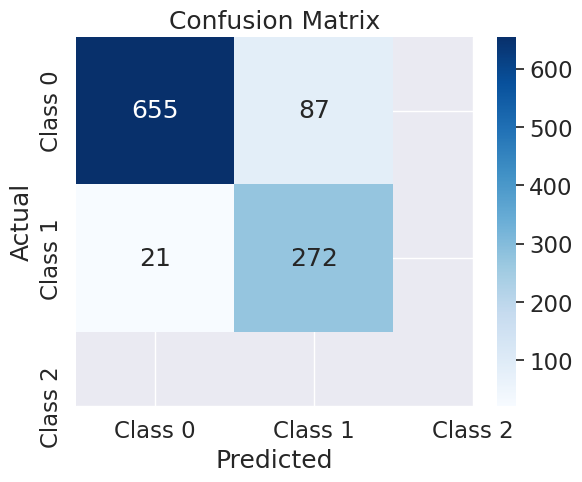

In [114]:
sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
sns.set(font_scale=1.5)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

Now Testing to see how it works on extra mail Samples

In [115]:
Input_email1="I hope this email finds you well. We have scheduled a team meeting for tomorrow at 10 AM in the conference room. The agenda for the meeting includes updates on ongoing projects and a discussion on upcoming events. Please come prepared with any necessary materials and updates. If you have any items you'd like to add to the agenda, feel free to let me know. Looking forward to seeing you there."
y1 = Input_email1

In [116]:
list2=[]
y1 = re.sub('[^a-zA-Z]', ' ', y1)
y1 = y1.split()
y1 = [ps.stem(word) for word in y1 if word.lower() not in stop_words]
y1 = " ".join(y1)
list2.append(y1)

In [117]:
new_email_feature_vector = cv.transform(list2).toarray()

# Use the trained KNN model to predict whether the email is spam or ham
prediction = model.predict(new_email_feature_vector)

# Print the prediction
if prediction[0] == 1:
    print("The email is predicted as spam.")
else:
    print("The email is predicted as ham.")

The email is predicted as ham.
